## Text Mining

### NLTK

In [ ]:
! pip3 install nltk
! pip3 install numpy

In [4]:
import nltk
# doinstalujeme závislosti
nltk.download(["brown","webtext", "words", "stopwords"] ) # datové sady
nltk.download(["punkt", "averaged_perceptron_tagger", "maxent_ne_chunker", "vader_lexicon", "wordnet", "tagsets", "omw-1.4"]) # modely

[nltk_data] Downloading package brown to
[nltk_data]     /Users/kvetinac97/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package webtext to
[nltk_data]     /Users/kvetinac97/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package words to
[nltk_data]     /Users/kvetinac97/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kvetinac97/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kvetinac97/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kvetinac97/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/kvetinac97/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[

True

In [9]:
from nltk.corpus import brown
# Kontrola stažení závislostí
print(brown.words()[0:10]) # slovník dané sady
print(brown.tagged_words()[0:10]) # otagovaná slova – je to podstatné/přídavné jméno?
len(brown.words())

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of']
[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN')]


1161192

### Text

In [11]:
# Vytažené z Wikipedie, text o Praze
text = """Prague is the capital and largest city of the Czech Republic. It is the 14th largest city in the European Union.
It is also the historical capital of Bohemia. Situated in the north-west of the country on the Vltava river,
the city is home to about 1.26 million people, while its larger urban zone is estimated to have a population of nearly 2 million.
The city has a temperate climate, with warm summers and chilly winters."""

### Basic Operations

#### Counting

In [14]:
from collections import Counter
tokens = nltk.word_tokenize(text) # rozdělení na jednotlivá slova

# seřadí podle nejčastějších slov
def tokenCounts(tokens):
    counts = Counter(tokens) # čítač slov
    sortedCounts = sorted(counts.items(), key=lambda count:count[1], reverse=True)
    return sortedCounts

tokenCounts(tokens)

[('the', 9),
 ('is', 5),
 ('.', 5),
 ('city', 4),
 ('of', 4),
 (',', 3),
 ('capital', 2),
 ('and', 2),
 ('largest', 2),
 ('It', 2),
 ('in', 2),
 ('to', 2),
 ('million', 2),
 ('a', 2),
 ('Prague', 1),
 ('Czech', 1),
 ('Republic', 1),
 ('14th', 1),
 ('European', 1),
 ('Union', 1),
 ('also', 1),
 ('historical', 1),
 ('Bohemia', 1),
 ('Situated', 1),
 ('north-west', 1),
 ('country', 1),
 ('on', 1),
 ('Vltava', 1),
 ('river', 1),
 ('home', 1),
 ('about', 1),
 ('1.26', 1),
 ('people', 1),
 ('while', 1),
 ('its', 1),
 ('larger', 1),
 ('urban', 1),
 ('zone', 1),
 ('estimated', 1),
 ('have', 1),
 ('population', 1),
 ('nearly', 1),
 ('2', 1),
 ('The', 1),
 ('has', 1),
 ('temperate', 1),
 ('climate', 1),
 ('with', 1),
 ('warm', 1),
 ('summers', 1),
 ('chilly', 1),
 ('winters', 1)]

#### Remove Punctuation

In [15]:
from string import punctuation
tokens = nltk.word_tokenize(text)

nopunc_tokens = [token for token in tokens if token not in punctuation] # odstranění interpunkce
tokenCounts(nopunc_tokens)

[('the', 9),
 ('is', 5),
 ('city', 4),
 ('of', 4),
 ('capital', 2),
 ('and', 2),
 ('largest', 2),
 ('It', 2),
 ('in', 2),
 ('to', 2),
 ('million', 2),
 ('a', 2),
 ('Prague', 1),
 ('Czech', 1),
 ('Republic', 1),
 ('14th', 1),
 ('European', 1),
 ('Union', 1),
 ('also', 1),
 ('historical', 1),
 ('Bohemia', 1),
 ('Situated', 1),
 ('north-west', 1),
 ('country', 1),
 ('on', 1),
 ('Vltava', 1),
 ('river', 1),
 ('home', 1),
 ('about', 1),
 ('1.26', 1),
 ('people', 1),
 ('while', 1),
 ('its', 1),
 ('larger', 1),
 ('urban', 1),
 ('zone', 1),
 ('estimated', 1),
 ('have', 1),
 ('population', 1),
 ('nearly', 1),
 ('2', 1),
 ('The', 1),
 ('has', 1),
 ('temperate', 1),
 ('climate', 1),
 ('with', 1),
 ('warm', 1),
 ('summers', 1),
 ('chilly', 1),
 ('winters', 1)]

#### Stopwords

In [31]:
from nltk.corpus import stopwords
from string import punctuation
stops = stopwords.words('english')
tokens = nltk.word_tokenize(text)

filtered_tokens = [token for token in tokens if token not in punctuation]
filtered_tokens = [token for token in filtered_tokens if token.lower() not in stops]
tokenCounts(filtered_tokens)

[('city', 4),
 ('capital', 2),
 ('largest', 2),
 ('million', 2),
 ('Prague', 1),
 ('Czech', 1),
 ('Republic', 1),
 ('14th', 1),
 ('European', 1),
 ('Union', 1),
 ('also', 1),
 ('historical', 1),
 ('Bohemia', 1),
 ('Situated', 1),
 ('north-west', 1),
 ('country', 1),
 ('Vltava', 1),
 ('river', 1),
 ('home', 1),
 ('1.26', 1),
 ('people', 1),
 ('larger', 1),
 ('urban', 1),
 ('zone', 1),
 ('estimated', 1),
 ('population', 1),
 ('nearly', 1),
 ('2', 1),
 ('temperate', 1),
 ('climate', 1),
 ('warm', 1),
 ('summers', 1),
 ('chilly', 1),
 ('winters', 1)]

### Text Processing techniques

#### Sentence Splitting

In [32]:
sentences = nltk.sent_tokenize(text) # rozdělení po větách

print(sentences)

['Prague is the capital and largest city of the Czech Republic.', 'It is the 14th largest city in the European Union.', 'It is also the historical capital of Bohemia.', 'Situated in the north-west of the country on the Vltava river,\nthe city is home to about 1.26 million people, while its larger urban zone is estimated to have a population of nearly 2 million.', 'The city has a temperate climate, with warm summers and chilly winters.']


#### Tokenization

In [34]:
sentences = nltk.sent_tokenize(text)
tokens = [nltk.word_tokenize(sent) for sent in sentences] # slova ve větách

print(tokens)

[['Prague', 'is', 'the', 'capital', 'and', 'largest', 'city', 'of', 'the', 'Czech', 'Republic', '.'], ['It', 'is', 'the', '14th', 'largest', 'city', 'in', 'the', 'European', 'Union', '.'], ['It', 'is', 'also', 'the', 'historical', 'capital', 'of', 'Bohemia', '.'], ['Situated', 'in', 'the', 'north-west', 'of', 'the', 'country', 'on', 'the', 'Vltava', 'river', ',', 'the', 'city', 'is', 'home', 'to', 'about', '1.26', 'million', 'people', ',', 'while', 'its', 'larger', 'urban', 'zone', 'is', 'estimated', 'to', 'have', 'a', 'population', 'of', 'nearly', '2', 'million', '.'], ['The', 'city', 'has', 'a', 'temperate', 'climate', ',', 'with', 'warm', 'summers', 'and', 'chilly', 'winters', '.']]


#### Part-Of-Speech Tagging

In [35]:
sentences = nltk.sent_tokenize(text)
tokens = [nltk.word_tokenize(sent) for sent in sentences]
tagged = [nltk.pos_tag(sent) for sent in tokens] # nad každou větou part-of-speech

print(tagged)

[[('Prague', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('capital', 'NN'), ('and', 'CC'), ('largest', 'JJS'), ('city', 'NN'), ('of', 'IN'), ('the', 'DT'), ('Czech', 'NNP'), ('Republic', 'NNP'), ('.', '.')], [('It', 'PRP'), ('is', 'VBZ'), ('the', 'DT'), ('14th', 'JJ'), ('largest', 'JJS'), ('city', 'NN'), ('in', 'IN'), ('the', 'DT'), ('European', 'NNP'), ('Union', 'NNP'), ('.', '.')], [('It', 'PRP'), ('is', 'VBZ'), ('also', 'RB'), ('the', 'DT'), ('historical', 'JJ'), ('capital', 'NN'), ('of', 'IN'), ('Bohemia', 'NNP'), ('.', '.')], [('Situated', 'VBN'), ('in', 'IN'), ('the', 'DT'), ('north-west', 'NN'), ('of', 'IN'), ('the', 'DT'), ('country', 'NN'), ('on', 'IN'), ('the', 'DT'), ('Vltava', 'NNP'), ('river', 'NN'), (',', ','), ('the', 'DT'), ('city', 'NN'), ('is', 'VBZ'), ('home', 'VBN'), ('to', 'TO'), ('about', 'IN'), ('1.26', 'CD'), ('million', 'CD'), ('people', 'NNS'), (',', ','), ('while', 'IN'), ('its', 'PRP$'), ('larger', 'JJR'), ('urban', 'JJ'), ('zone', 'NN'), ('is', 'VBZ'), ('estimated

In [41]:
nltk.help.upenn_tagset('JJ*') # pokud si nebudeme jistí, co znamená tag, můžeme se zeptat

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
JJR: adjective, comparative
    bleaker braver breezier briefer brighter brisker broader bumper busier
    calmer cheaper choosier cleaner clearer closer colder commoner costlier
    cozier creamier crunchier cuter ...
JJS: adjective, superlative
    calmest cheapest choicest classiest cleanest clearest closest commonest
    corniest costliest crassest creepiest crudest cutest darkest deadliest
    dearest deepest densest dinkiest ...


#### Stemming and Lemmatization

In [44]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokens = nltk.word_tokenize(text) # kořen

stems = {token:stemmer.stem(token) for token in tokens}
print(stems)

{'Prague': 'pragu', 'is': 'is', 'the': 'the', 'capital': 'capit', 'and': 'and', 'largest': 'largest', 'city': 'citi', 'of': 'of', 'Czech': 'czech', 'Republic': 'republ', '.': '.', 'It': 'it', '14th': '14th', 'in': 'in', 'European': 'european', 'Union': 'union', 'also': 'also', 'historical': 'histor', 'Bohemia': 'bohemia', 'Situated': 'situat', 'north-west': 'north-west', 'country': 'countri', 'on': 'on', 'Vltava': 'vltava', 'river': 'river', ',': ',', 'home': 'home', 'to': 'to', 'about': 'about', '1.26': '1.26', 'million': 'million', 'people': 'peopl', 'while': 'while', 'its': 'it', 'larger': 'larger', 'urban': 'urban', 'zone': 'zone', 'estimated': 'estim', 'have': 'have', 'a': 'a', 'population': 'popul', 'nearly': 'nearli', '2': '2', 'The': 'the', 'has': 'ha', 'temperate': 'temper', 'climate': 'climat', 'with': 'with', 'warm': 'warm', 'summers': 'summer', 'chilly': 'chilli', 'winters': 'winter'}


In [45]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
tokens = nltk.word_tokenize(text) # základní forma slova

lemmas = {token:lemmatizer.lemmatize(token) for token in tokens}
print(lemmas)

{'Prague': 'Prague', 'is': 'is', 'the': 'the', 'capital': 'capital', 'and': 'and', 'largest': 'largest', 'city': 'city', 'of': 'of', 'Czech': 'Czech', 'Republic': 'Republic', '.': '.', 'It': 'It', '14th': '14th', 'in': 'in', 'European': 'European', 'Union': 'Union', 'also': 'also', 'historical': 'historical', 'Bohemia': 'Bohemia', 'Situated': 'Situated', 'north-west': 'north-west', 'country': 'country', 'on': 'on', 'Vltava': 'Vltava', 'river': 'river', ',': ',', 'home': 'home', 'to': 'to', 'about': 'about', '1.26': '1.26', 'million': 'million', 'people': 'people', 'while': 'while', 'its': 'it', 'larger': 'larger', 'urban': 'urban', 'zone': 'zone', 'estimated': 'estimated', 'have': 'have', 'a': 'a', 'population': 'population', 'nearly': 'nearly', '2': '2', 'The': 'The', 'has': 'ha', 'temperate': 'temperate', 'climate': 'climate', 'with': 'with', 'warm': 'warm', 'summers': 'summer', 'chilly': 'chilly', 'winters': 'winter'}


#### Named Entity Recognition

In [46]:
tokens = nltk.word_tokenize(text)
tagged = nltk.pos_tag(tokens)

ne_chunked = nltk.ne_chunk(tagged, binary=True) # hledáme pojmenované entity
print(ne_chunked) # vrací stromovou strukturu

(S
  (NE Prague/NN)
  is/VBZ
  the/DT
  capital/NN
  and/CC
  largest/JJS
  city/NN
  of/IN
  the/DT
  (NE Czech/NNP Republic/NNP)
  ./.
  It/PRP
  is/VBZ
  the/DT
  14th/JJ
  largest/JJS
  city/NN
  in/IN
  the/DT
  (NE European/NNP Union/NNP)
  ./.
  It/PRP
  is/VBZ
  also/RB
  the/DT
  historical/JJ
  capital/NN
  of/IN
  (NE Bohemia/NNP)
  ./.
  Situated/VBN
  in/IN
  the/DT
  north-west/NN
  of/IN
  the/DT
  country/NN
  on/IN
  the/DT
  (NE Vltava/NNP)
  river/NN
  ,/,
  the/DT
  city/NN
  is/VBZ
  home/VBN
  to/TO
  about/IN
  1.26/CD
  million/CD
  people/NNS
  ,/,
  while/IN
  its/PRP$
  larger/JJR
  urban/JJ
  zone/NN
  is/VBZ
  estimated/VBN
  to/TO
  have/VB
  a/DT
  population/NN
  of/IN
  nearly/RB
  2/CD
  million/CD
  ./.
  The/DT
  city/NN
  has/VBZ
  a/DT
  temperate/NN
  climate/NN
  ,/,
  with/IN
  warm/JJ
  summers/NNS
  and/CC
  chilly/JJ
  winters/NNS
  ./.)


In [47]:
def extractEntities(ne_chunked):
    data = {}
    for entity in ne_chunked: # projdeme strukturu
        if isinstance(entity, nltk.tree.Tree):
            text = " ".join([word for word, tag in entity.leaves()])
            ent = entity.label()
            data[text] = ent
        else:
            continue
    return data

extractEntities(ne_chunked)

{'Prague': 'NE',
 'Czech Republic': 'NE',
 'European Union': 'NE',
 'Bohemia': 'NE',
 'Vltava': 'NE'}

In [48]:
# Disambiguation of entity with entity types
ne_chunked = nltk.ne_chunk(tagged, binary=False) # získáme i kategorii
extractEntities(ne_chunked)

{'Prague': 'GPE',
 'Czech Republic': 'ORGANIZATION',
 'European Union': 'ORGANIZATION',
 'Bohemia': 'GPE',
 'Vltava': 'ORGANIZATION'}

#### Sentiment Analysis

In [49]:
from nltk.sentiment.util import *
from nltk.sentiment import SentimentIntensityAnalyzer

vader_analyzer = SentimentIntensityAnalyzer()
print(vader_analyzer.polarity_scores(text)) # provedeme analýzu sentimentu

{'neg': 0.0, 'neu': 0.974, 'pos': 0.026, 'compound': 0.2263}


### Wordcloud

In [ ]:
! pip3 install wordcloud Image matplotlib # do-instalace

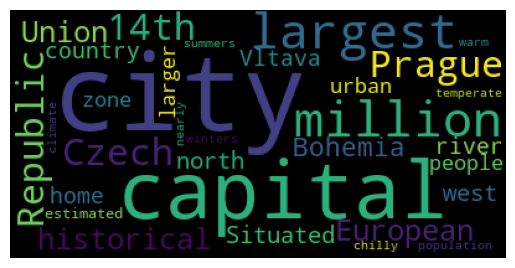

In [64]:
%matplotlib inline
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(text) # vygenerujeme si word cloud

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word Embeddings - Word2Vec

In [ ]:
! pip install gensim # do-instalace

In [70]:
import gensim 
from gensim.models import Word2Vec 

# data
from nltk.corpus import brown
data = brown.sents() # sents = sentences = věty

# min_count: vyhází slova, která mají frekvenci menší než 5
# vector_size: velikost vektorového prostoru (méně = menší prostor)
# window: jak velké okolí (5 = 2 slova za, 2 slova před)
# workers: vlákna pro výpočet

# Create CBOW model 
cbow_model = gensim.models.Word2Vec(data, min_count = 5, vector_size = 100, window = 5, workers=10)
  
# Create Skip Gram model 
sg_model = gensim.models.Word2Vec(data, min_count = 5, vector_size = 100, window = 5, sg = 1, workers=10) 

In [72]:
cbow_model.wv['nice'] # takto vypadá vektor pro slovo "nice"

array([ 0.15793943,  0.1569677 ,  0.14505273, -0.11775517,  0.19425185,
       -0.14660464,  0.15434271,  0.5963859 , -0.1519637 , -0.27141735,
        0.06797849, -0.21739489, -0.04359275, -0.01417997,  0.33026376,
       -0.08249688,  0.06793763, -0.08164439, -0.13821363, -0.6591027 ,
        0.33437902,  0.2309186 ,  0.5451676 ,  0.06035151, -0.24176374,
       -0.05227718, -0.2825107 , -0.18176834, -0.08703998,  0.1230007 ,
        0.39897144, -0.21296395,  0.5384599 , -0.21242565, -0.18311223,
        0.46085453, -0.22300352,  0.15849103,  0.11506356, -0.14199914,
        0.04614349, -0.04987507,  0.20521282,  0.07747979,  0.35204345,
        0.07351254, -0.1918671 , -0.14468679, -0.01877994,  0.26497886,
       -0.01482415, -0.07032227, -0.37672174, -0.22010729,  0.06635988,
       -0.42484352,  0.10732687,  0.17825294,  0.05488529,  0.17867798,
       -0.07741626,  0.3071386 ,  0.09079547, -0.03356583, -0.3622748 ,
        0.31802532,  0.6072959 ,  0.07009597, -0.36234397,  0.43

In [80]:
cbow_model.wv.most_similar("car", topn=3) # díváme se na první 3 slova
# v podobném kontextu jako auto se používá dům, hala a pokoj

[('house', 0.9467045068740845),
 ('hall', 0.9048487544059753),
 ('room', 0.9046309590339661)]

In [78]:
sg_model.wv.most_similar("car", topn=3)
# druhý model predikuje jiným způsobem, proto jiný výsledek

[('ball', 0.8882231712341309),
 ('truck', 0.8628429770469666),
 ('house', 0.855819582939148)]

### Word Embeddings - FastText

In [81]:
import gensim 
from gensim.models import FastText

# data
from nltk.corpus import brown
data = brown.sents()

# vytvoří si slovník a pracuje s ním
fasttext_model = FastText(vector_size=100, window=20, min_count=5)
fasttext_model.build_vocab(corpus_iterable=data)
fasttext_model.train(corpus_iterable=data, total_examples=len(data), epochs=10)  # train

(7816563, 11611920)

In [82]:
print(fasttext_model.wv.most_similar("nice", topn=3))
# Podobná slova tady vypadají takto, protože kořen je "nic"
# dá se tedy přirovnat, jako by to bylo rýmování v básni

[('Venice', 0.9623996615409851), ('Voice', 0.9303227663040161), ('juice', 0.9231458306312561)]


In [ ]:
# dlouho to trvá
# # https://fasttext.cc/docs/en/crawl-vectors.html
# ft = gensim.models.fasttext.load_facebook_vectors("cc.en.300.bin.gz")
# ft.wv.most_similar(["nice"], topn=3)

### Visualize

In [ ]:
! pip install scikit-learn

In [83]:
from sklearn.decomposition import PCA
# hledá ve vektorech části tak, aby mu stačil menší prostor

In [84]:
for model in [cbow_model, sg_model, fasttext_model]:
    print(model)
    sim_words = {words: [item[0] for item in model.wv.most_similar([words], topn=5)]
                  for words in ['person', 'house', 'cat', 'nice', 'soldier', 'metal', 'weather']}
    for k,v in sim_words.items():
        print(k+":"+str(v))
    print("")
# Nejpodobnější slova pro nastřelenou množinu slov

Word2Vec<vocab=15173, vector_size=100, alpha=0.025>
person:['chance', 'child', 'word', 'idea', 'mistake']
house:['car', 'room', 'hand', 'bed', 'door']
cat:['pork', 'sandals', 'meat', 'soloist', 'sharply']
nice:['joke', 'lonely', 'happy', 'interesting', 'bad']
soldier:['minister', 'released', 'conductor', 'candidate', 'spectacle']
metal:['salt', 'pink', 'sugar', 'smoke', 'jar']
weather:['movements', 'rare', 'skill', 'exterior', 'anxiety']

Word2Vec<vocab=15173, vector_size=100, alpha=0.025>
person:['sin', 'alternative', 'teacher', 'harm', 'difficulty']
house:['ball', 'bed', 'dress', 'car', 'hotel']
cat:['sadly', 'sweater', 'grin', 'waiter', 'virgin']
nice:['awfully', 'funny', 'lonely', 'cook', 'joke']
soldier:['solitary', 'farmer', 'widow', 'minister', 'reporter']
metal:['bowl', 'tile', 'cloth', 'beams', 'foil']
weather:['tones', 'shade', 'colors', 'deepest', 'rapidly']

FastText<vocab=15173, vector_size=100, alpha=0.025>
person:['personnel', 'personal', 'personally', 'persons', 'person

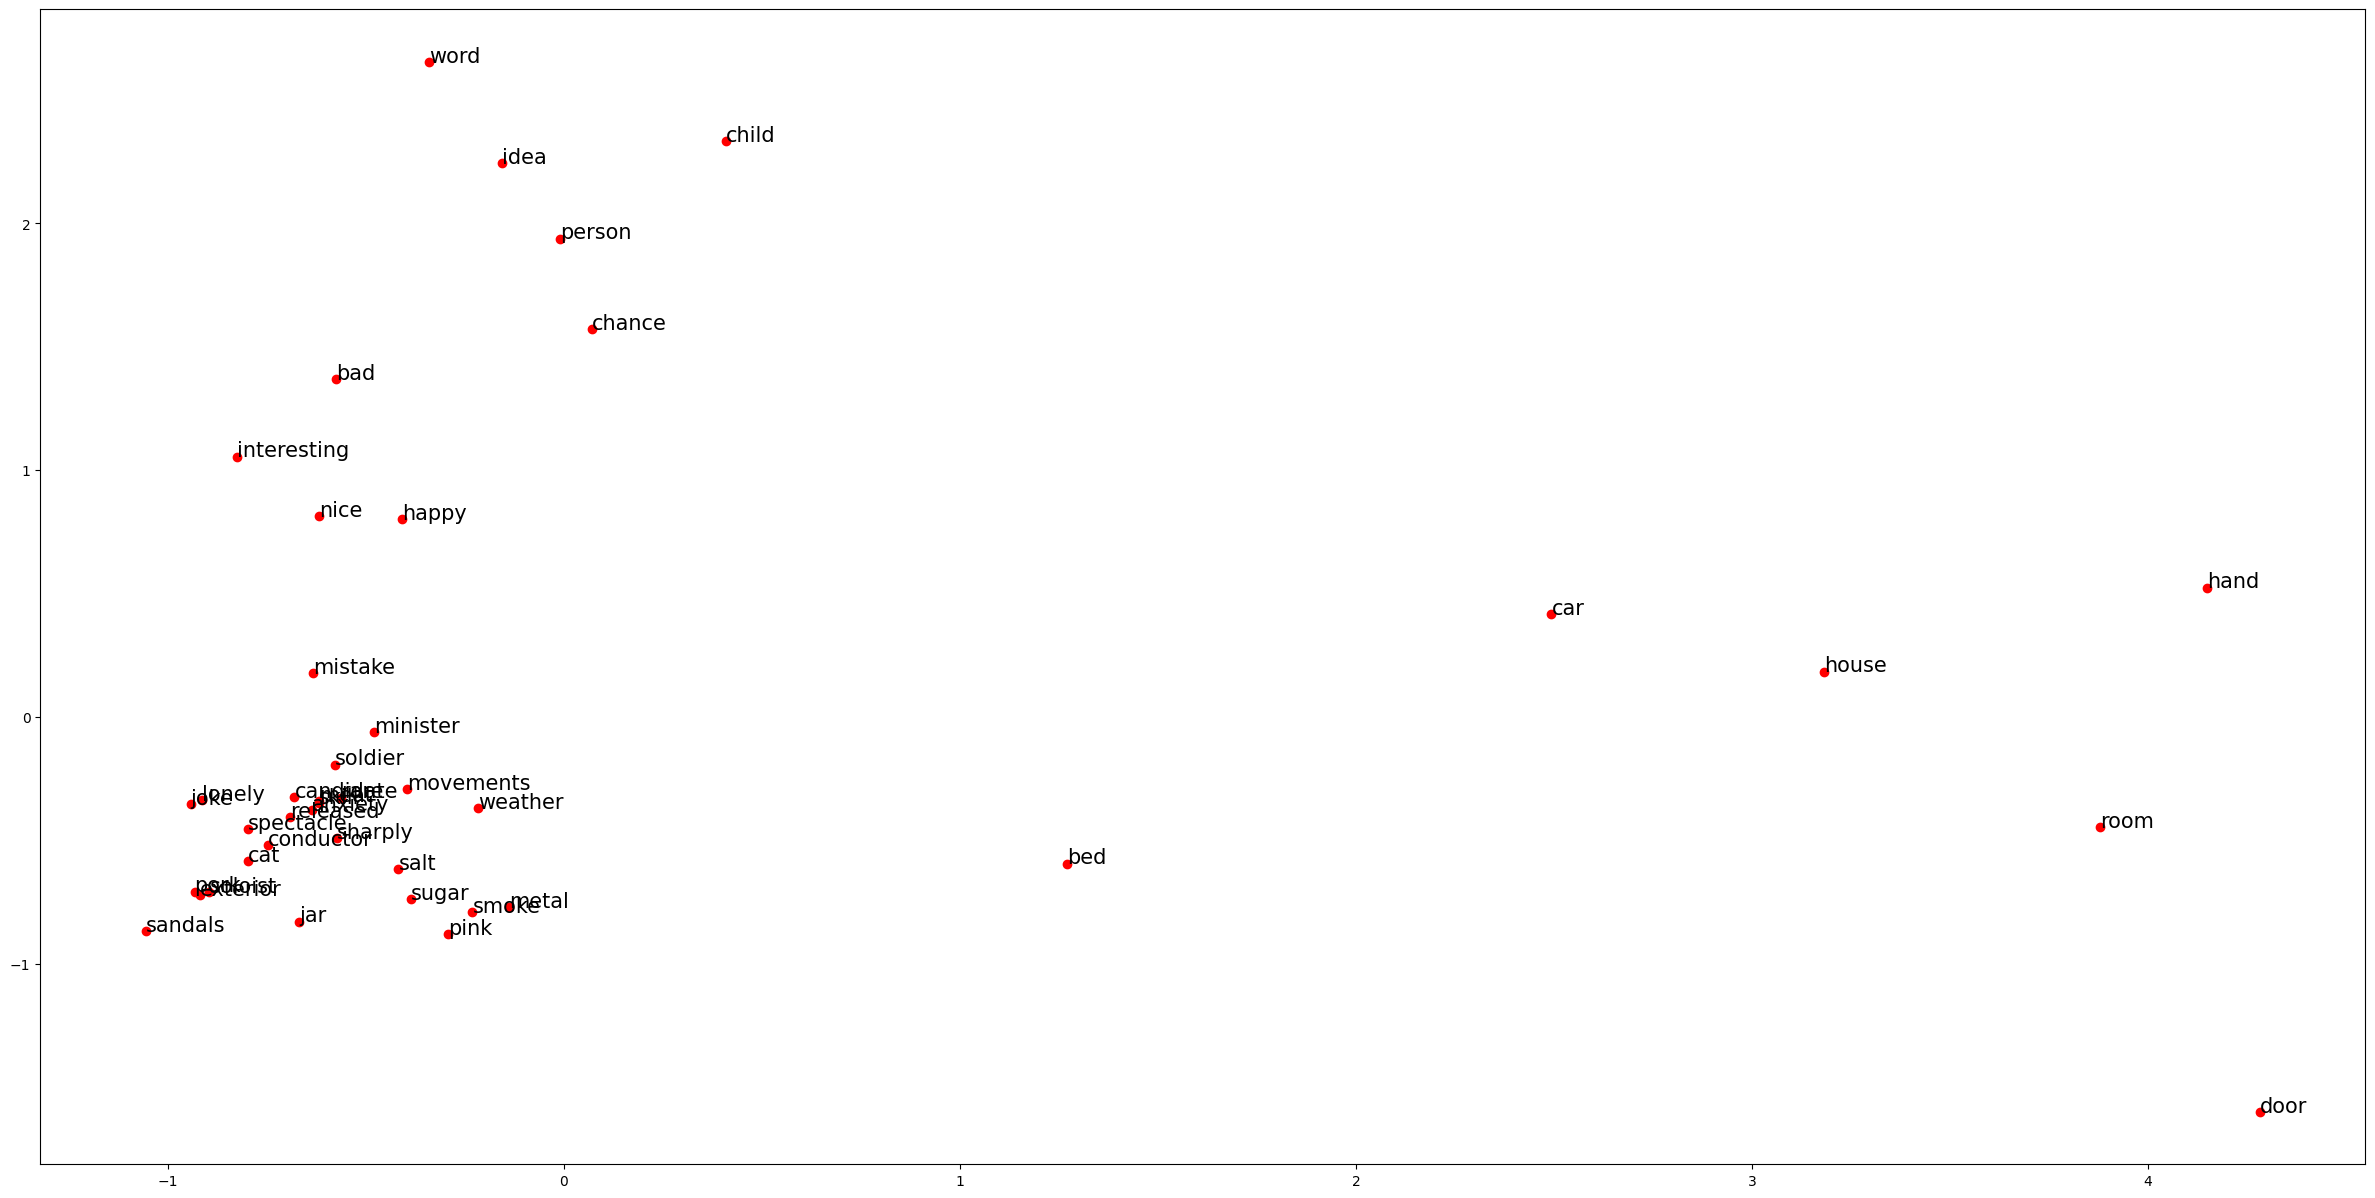

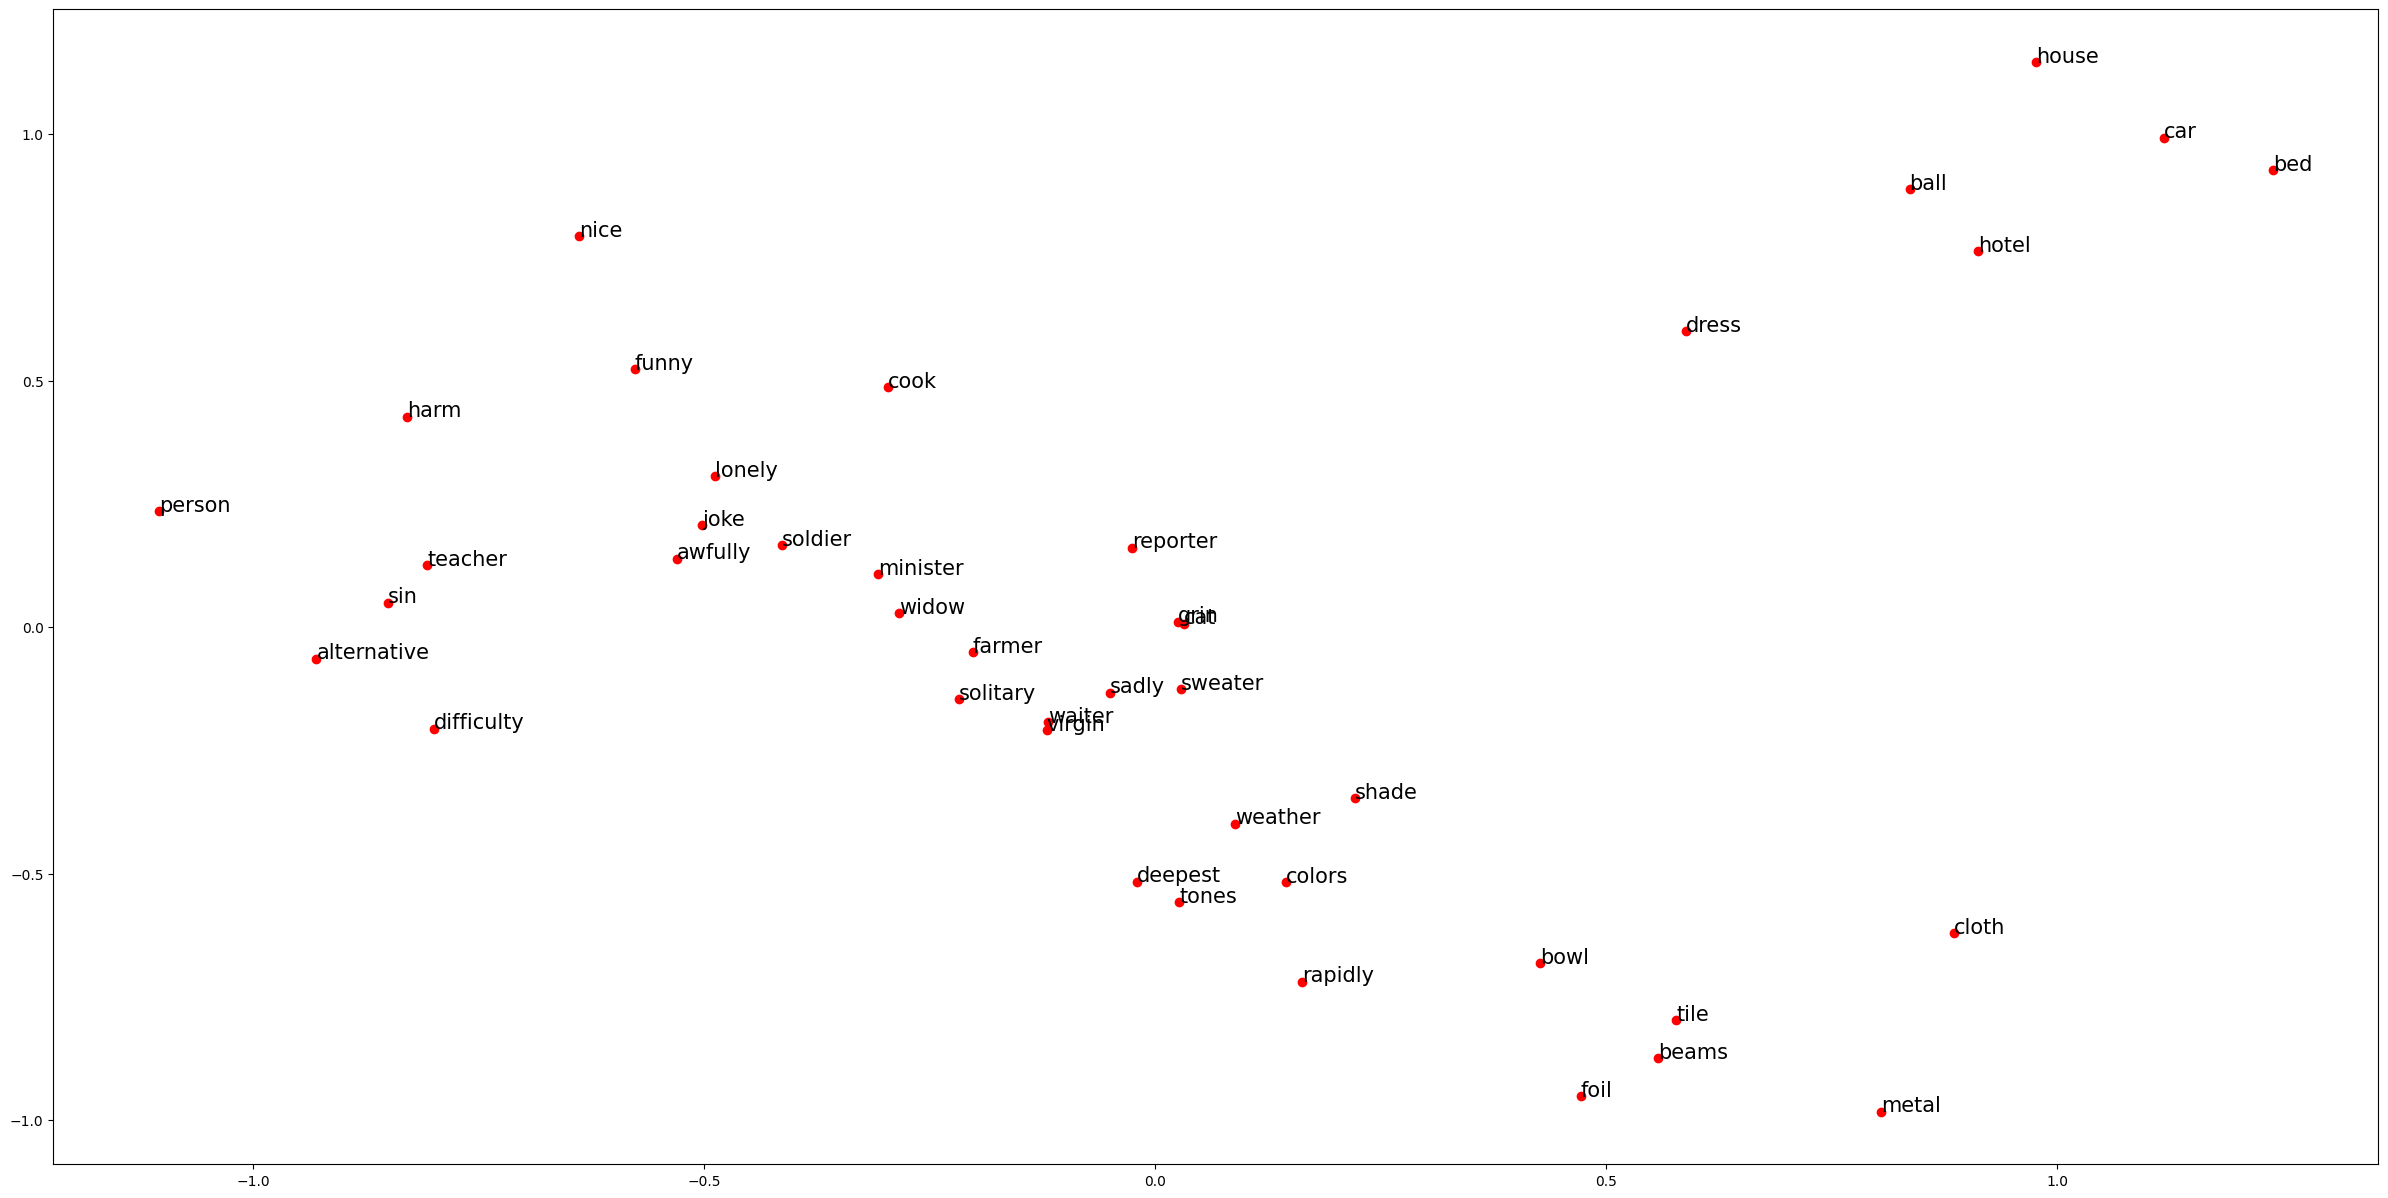

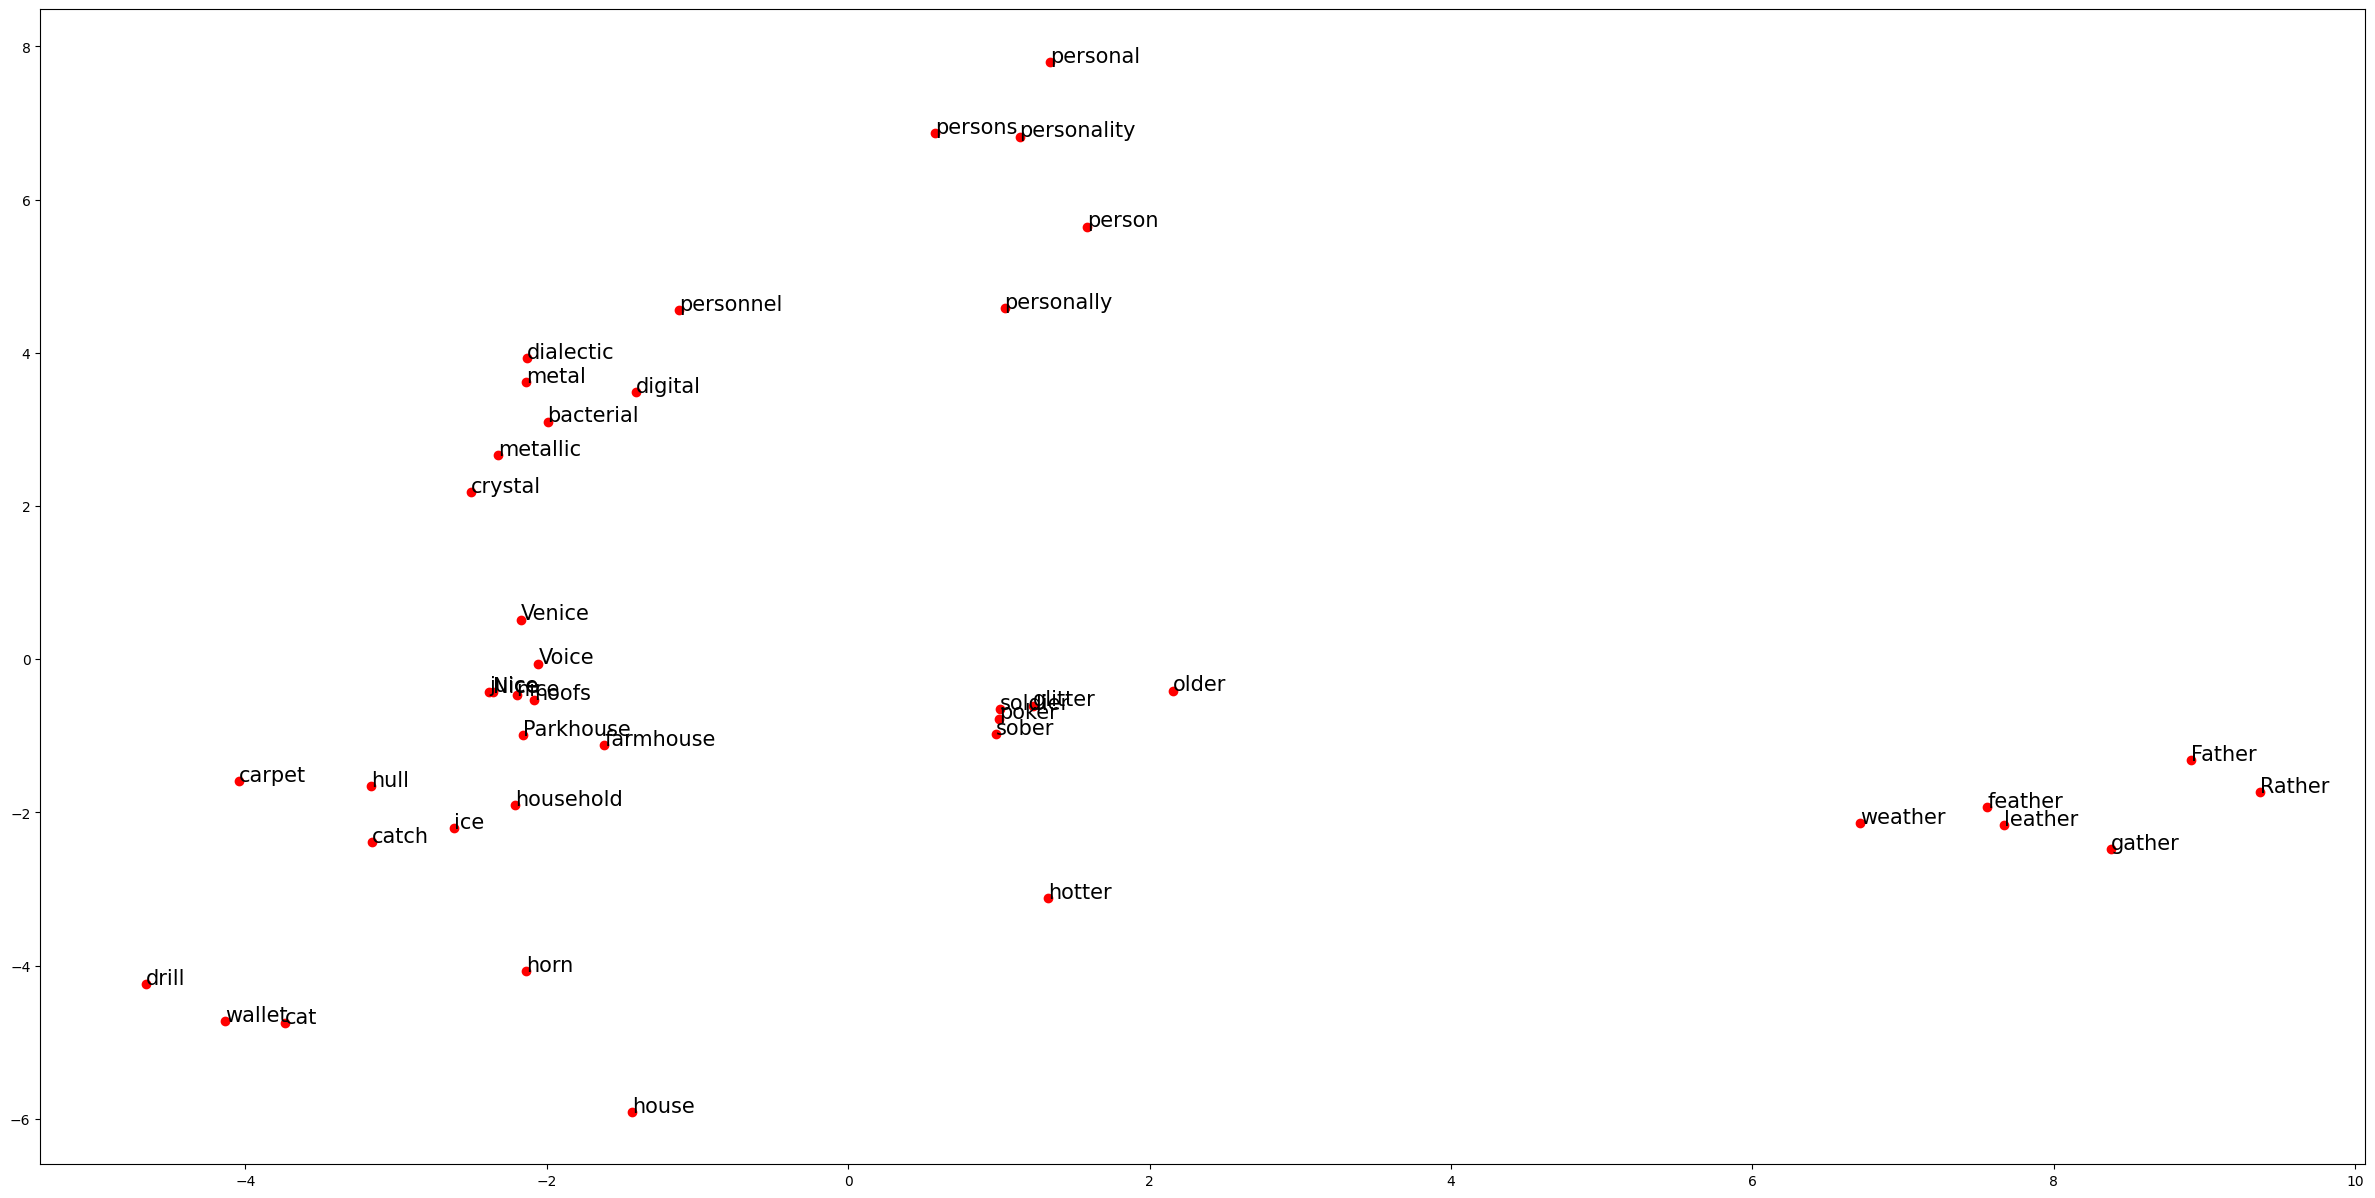

In [85]:
for model in [cbow_model, sg_model, fasttext_model]:
    sim_words = {words: [item[0] for item in model.wv.most_similar([words], topn=5)]
                  for words in ['person', 'house', 'cat', 'nice', 'soldier', 'metal', 'weather']}
    all_sim_words = sum([[k] + v for k, v in sim_words.items()], [])
    word_vectors = model.wv[all_sim_words]

    pca = PCA(n_components=2)
    pca_comps = pca.fit_transform(word_vectors)
    word_names = all_sim_words

    plt.figure(figsize=(30, 15))
    plt.scatter(pca_comps[:, 0], pca_comps[:, 1], c='red')

    for word_names, x, y in zip(word_names, pca_comps[:, 0], pca_comps[:, 1]):
        plt.annotate(word_names, xy=(x, y), size=15)
    plt.show()
# Vykreslí jednotlivé word to vecy v daném vektorovém prostoru